## Statistical Analysis of Customer Purchase Behaviour Exercise
### 1. t-test
### 2. chi square
### 3. simple regression
### 4. multiple regression

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.DataFrame({
    'customer_id': range(1, 21),
    'gender': ['Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female',
               'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male'],
    'membership_status': ['Member', 'Non-member', 'Member', 'Member', 'Non-member', 'Member', 'Member',
                          'Non-member', 'Member', 'Member', 'Member', 'Member', 'Non-member', 'Non-member',
                          'Non-member', 'Non-member', 'Non-member', 'Member', 'Non-member', 'Member'],
    'category': ['Electronics', 'Clothing', 'Groceries', 'Groceries', 'Groceries', 'Electronics', 'Clothing',
                 'Clothing', 'Clothing', 'Groceries', 'Electronics', 'Groceries', 'Groceries', 'Clothing',
                 'Groceries', 'Clothing', 'Electronics', 'Clothing', 'Electronics', 'Clothing'],
    'num_items': [8, 9, 2, 2, 5, 5, 6, 3, 8, 1, 6, 4, 1, 7, 9, 4, 4, 6, 3, 6],
    'days_since_last_order': [47, 57, 22, 47, 56, 30, 43, 48, 17, 26, 36, 1, 8, 49, 35, 52, 15, 47, 56, 22],
    'order_amount': [216.28, 84.92, 57.61, 74.25, 53.61, 172.91, 82.53, 54.15, 119.17, 67.37,
                     145.97, 104.37, 27.53, 105.97, 113.76, 75.13, 117.72, 137.15, 111.81, 132.88]
})

<div style="background-color:#f0f8ff; padding:10px; border-left:10px solid #2196F3; font-size:20px;">
  <b>1. t-test:</b> Compare whether there is a significant difference in order_amount between Male and Female.
</div>


In [4]:
male_orders = data[data['gender'] == 'Male']['order_amount']
female_orders = data[data['gender'] == 'Female']['order_amount']

t_stat, p_value = stats.ttest_ind(male_orders, female_orders)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

t-statistic: -0.8946
p-value: 0.3828


- **t-statistic: -0.8946**
    - A small difference between groups indicates that the gender variable is not significant and does not have an effect on order_amount.


- H₀:There is no significant difference in the average order amount between Male and Female customers.
- H₁:There is a significant difference in the average order amount between Male and Female customers.

- **p-value: 0.3828 > 0.05**
    - indicating that we do not have sufficient evidence to reject the null hypothesis that "there is no significant relationship between gender and order amount."
    - The difference in order amounts between male and female customers is not statistically significant and is likely due to random variation.
        - Assuming you accept H0, it doesn't necessarily mean you will make a Type II error, but you should always be aware of its possibility and try to minimize the chance of it occurring.




<div style="background-color:#f0f8ff; padding:10px; border-left:10px solid #2196F3; font-size:20px;">
  <b>2. Chi-square test: </b> Check whether there is an association between membership_status and category.
</div>

In [5]:
contingency_table = pd.crosstab(data['membership_status'], data['category'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square test statistic:", chi2)
print("p-value:", p)

Chi-square test statistic: 0.14430014430014435
p-value: 0.9303912595169843


- **Chi-square test statistic = 0.1443**
    - This value is very small (close to 0), which indicates that the observed values are very close to the expected values
    - In other words, there is no significant difference between observed and expected.
    - Therefore, no evidence of association between the variables.

- **p-value: 0.9303912595169843**
    - Since the p-value ≥ 0.05, we fail to reject the null hypothesis, meaning there is not enough evidence to suggest that membership_status and category are related.
    - In other words, they are statistically independent, and there is no significant relationship between the categorical variables.

<div style="background-color:#f0f8ff; padding:10px; border-left:10px solid #2196F3; font-size:20px;">
  <b>3. Simple regression: </b> Use num_items to predict order_amount.
</div>

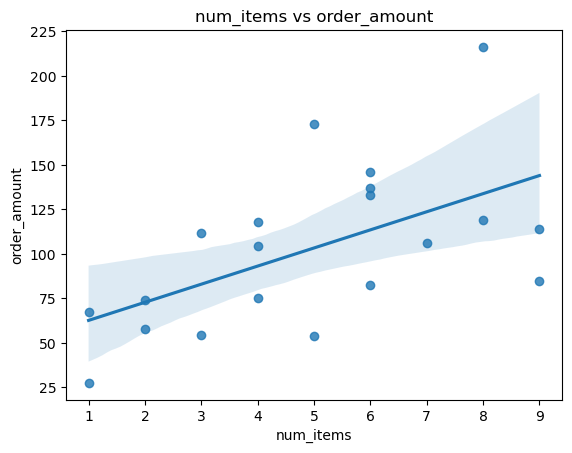

                            OLS Regression Results                            
Dep. Variable:           order_amount   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     8.456
Date:                Sun, 08 Jun 2025   Prob (F-statistic):            0.00938
Time:                        22:11:01   Log-Likelihood:                -100.16
No. Observations:                  20   AIC:                             204.3
Df Residuals:                      18   BIC:                             206.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.4025     19.303      2.715      0.0

In [6]:
sns.regplot(x='num_items', y='order_amount', data=data)
plt.title("num_items vs order_amount")
plt.show()

model_simple = smf.ols('order_amount ~ num_items', data=data).fit()

print(model_simple.summary())

**OLS (Ordinary Least Squares) Linear Regression**

- the regression equation is: Y^hat = 52.40 + 10.17 ⋅ num_items
    - For every additional item purchased, the order amount increases by approximately 10.17 units on average.
    - A positive correlation means: the more items, the higher the order_amount.

- R-squared	0.320
    - The model is statistically significant overall, but num_items only explains 32% of the variation in order_amount.
    - Additional variables (e.g., customer type, promotion activity, etc.) may be needed to improve the model.
 
- num_items p-value: 0.009 (< 0.05)
    - This result is statistically significant.
    - num_items does affect order_amount, and the effect is not due to random chance.

- F-statistic: 8.456
    - Indicates model is statistically significant overall

- Prob (F-stat): 0.00938
    - < 0.05 → the model is statistically significant
 
- Confidence Intervals （95% CI）
    - Intercept	[11.85, 92.96]
    - num_items	[2.82, 17.52]
    - Since neither interval includes 0 → Both terms are statistically significant.

- Final Interpretation
    - This is a valid simple regression model.
    - num_items is a significant predictor of order_amount.
    - However, since R² is only 0.32, the model explains about one-third of the variation → other features (e.g., category, membership) likely also influence order_amount.

<div style="background-color:#f0f8ff; padding:10px; border-left:10px solid #2196F3; font-size:20px;">
  <b>4. Multiple regression:</b> Use num_items to predict order_amount.
</div>


In [7]:
model_multi = smf.ols('order_amount ~ num_items + days_since_last_order + membership_status', data=data).fit()

print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:           order_amount   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     5.320
Date:                Sun, 08 Jun 2025   Prob (F-statistic):            0.00981
Time:                        22:30:12   Log-Likelihood:                -97.089
No. Observations:                  20   AIC:                             202.2
Df Residuals:                      16   BIC:                             206.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

- Adj. R-squared：0.405
    - Adjusted for number of predictors (3 predictors).

- Prob (F-statistic)：0.00981
    - p < 0.05 → The model is statistically significant overall.

- num_items
    - Still a strong and significant positive predictor — confirms the earlier simple regression.
    - Has the most significant impact on order amount：Each extra item adds 10.19 to order amount.

- membership_status
    - coefficient: -38.0889
        - membership_status[T.Non-member] means: The comparison is Non-member vs Member (baseline)
        - Non-members spend about 38 units less on average than Members.
        - It helps the model explain why some people spend less even when they buy the same number of items, thereby improving the model's fit.
    - 95% CI: [-73.232, -2.946]
        - does not include 0 → further confirms significance

- days_since_last_order：
    - p-value = 0.895
        - Much greater than 0.05
        - not statistically significant.
        - It likely has no meaningful effect on order_amount in this dataset
    - Confidence Interval includes 0
        - Confirms it's not significant.

- The overall explanatory power of the model increased to nearly 50%, showing a clear improvement compared to the one-variable model.
    - Adjusted R² increased from ~0.28 → 0.405
    - The new variables (especially membership_status) genuinely improved the model — not just by chance.